<a href="https://colab.research.google.com/gist/qbeer/22fe5333a1bd5c329fc2982d7dc5f7e0/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math

import sys
import os

import seaborn as sns

# Supervised learning introduction, K-Nearest Neighbors (KNN)

Your task will be to predict wine quality from physicochemical features with the help of the 
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). You will have to do it both as a regression and classification task. 


-------

### 1. Read data
  - Read the provided winequality-red.csv file. 
  - Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.  
  - Use all columns except the last as features and the quality column as target. 
  - Make 80-20% train test split (use sklearn).
  - Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) *You will have to use the one-hot encoded labels in the classification exercise only.*
  - Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.

#### 1/a-b. Loading, checking NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


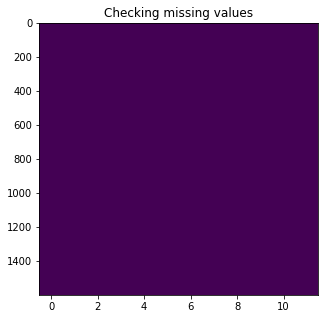

In [2]:
wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
print(wine_data.info())

plt.figure(figsize=(5, 5))
plt.title("Checking missing values")
im = plt.imshow(wine_data.isna(), aspect='auto')
plt.show()

So, it doesn't seems like that these have missing values.

In [3]:
wine_data = wine_data[~wine_data.duplicated()].reset_index(drop=True)   #tilde for the WIN, reset index and drop the original index!
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#Let's recognize which valeus will be used, by listing them!
features = list(wine_data.columns[0:11])
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


#### 1/c. 80%-20% test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:

#now lets make a 2d train set and a 1d test set
#i am silly... the 10d features can be inputed, quality is y
X_train, X_test, Y_train, Y_test = train_test_split( wine_data[features], wine_data['quality'], train_size=0.8)
Y_train, Y_test = np.array(Y_train), np.array(Y_test)
display(X_train)
display(X_test)
display(Y_train)
display(Y_test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
953,6.6,0.500,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3
16,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0
526,9.4,0.410,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,12.2
1167,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0
134,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3
...,...,...,...,...,...,...,...,...,...,...,...
742,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4
309,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
398,8.9,0.590,0.39,2.3,0.095,5.0,22.0,0.99860,3.37,0.58,10.3
1141,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
264,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5
350,12.2,0.480,0.54,2.60,0.085,19.0,64.0,1.00000,3.10,0.61,10.5
850,6.4,0.690,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.9
623,7.1,0.660,0.00,3.90,0.086,17.0,45.0,0.99760,3.46,0.54,9.5
741,5.8,1.010,0.66,2.00,0.039,15.0,88.0,0.99357,3.66,0.60,11.5
...,...,...,...,...,...,...,...,...,...,...,...
919,10.3,0.270,0.56,1.40,0.047,3.0,8.0,0.99471,3.16,0.51,11.8
657,9.0,0.580,0.25,2.80,0.075,9.0,104.0,0.99779,3.23,0.57,9.7
793,8.4,0.670,0.19,2.20,0.093,11.0,75.0,0.99736,3.20,0.59,9.2
1357,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


array([6, 4, 7, ..., 5, 5, 5])

array([5, 6, 6, 5, 6, 6, 7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5,
       5, 5, 5, 6, 5, 5, 8, 7, 6, 7, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 7, 5,
       7, 5, 5, 6, 5, 6, 6, 7, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 6, 7, 6, 6,
       5, 6, 6, 7, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 5, 5, 6, 4, 5, 5, 7, 6, 7, 6, 5, 6, 6, 5, 6, 5, 6,
       5, 6, 6, 7, 6, 6, 7, 6, 6, 6, 5, 5, 5, 6, 4, 6, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 4, 5, 5, 6, 5, 6, 7, 4, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6,
       5, 7, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 6, 5, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 7, 6, 5, 4, 6, 5, 5, 5, 6, 5, 6, 7,
       7, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 8, 5, 7, 7, 8, 5, 4, 6,
       6, 4, 6, 6, 7, 5, 6, 5, 6, 6, 4, 6, 5, 6, 6, 6, 7, 6, 6, 6, 7, 5,
       6, 6, 5, 4, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 5, 6,
       6, 6, 5, 6, 5, 4, 5, 6])

#### 1/d. One-hot Encoding

In [182]:
one_hot_quality_train = pd.DataFrame(pd.get_dummies(Y_train, prefix="Quality"),dtype=int)
one_hot_quality_test = pd.DataFrame(pd.get_dummies(Y_test, prefix="Quality"),dtype=int)

#update, we have to get the unique values too
qualities_train = dict(list(zip(np.unique(Y_train,axis=0),np.unique(one_hot_quality_train,axis=0))))
qualities_test = dict(list(zip(np.unique(Y_train,axis=0),np.unique(one_hot_quality_test,axis=0))))

display(one_hot_quality_train )
display(qualities_train)
display(qualities_test)


display(qualities_test.keys())

,Quality_3,Quality_4,Quality_5,Quality_6,Quality_7,Quality_8
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1082,0,0,1,0,0,0
1083,0,0,0,1,0,0
1084,0,0,1,0,0,0
1085,0,0,1,0,0,0


{3: array([0, 0, 0, 0, 0, 1]),
 4: array([0, 0, 0, 0, 1, 0]),
 5: array([0, 0, 0, 1, 0, 0]),
 6: array([0, 0, 1, 0, 0, 0]),
 7: array([0, 1, 0, 0, 0, 0]),
 8: array([1, 0, 0, 0, 0, 0])}

{3: array([0, 0, 0, 0, 1]),
 4: array([0, 0, 0, 1, 0]),
 5: array([0, 0, 1, 0, 0]),
 6: array([0, 1, 0, 0, 0]),
 7: array([1, 0, 0, 0, 0])}

dict_keys([3, 4, 5, 6, 7])

#### 1/e. Normalizing

In [8]:
normalized_X_train=(X_train-X_train.mean())/X_train.std()   #no standarscaler, just as it was asked
normalized_X_test=(X_test-X_test.mean())/X_test.std() 
display(normalized_X_train)
display(normalized_X_test)

#and then i convert
normalized_X_train, normalized_X_test = np.array(normalized_X_train), np.array(normalized_X_test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
953,-0.998888,-0.138557,-1.420612,-0.551317,-0.514081,0.490977,-0.562483,-1.720313,0.869829,-0.619199,1.723519
16,-0.531806,0.350000,-1.009414,1.495357,-0.046868,-0.944837,-0.532486,0.401477,0.480786,-0.899645,-1.345220
526,0.635900,-0.627113,1.046580,1.652793,-0.319409,-0.561953,-0.802461,0.346791,0.221424,0.726940,1.630527
1167,-0.064723,1.951378,-0.392615,-0.866190,-0.046868,-0.849116,-0.472491,-1.129711,-1.269907,-1.124001,-0.415299
134,-0.590191,-1.061385,0.995180,-0.315163,-0.222073,-1.040558,-1.072436,-0.473488,0.156583,-0.731377,-0.136323
...,...,...,...,...,...,...,...,...,...,...,...
742,-0.473420,-0.572829,0.224183,0.157147,-0.416745,-0.849116,-0.652475,-0.210999,-0.426981,-1.236180,-0.043331
309,-1.290815,-1.712793,0.635382,-0.866190,-0.436212,2.357536,3.547140,-2.989011,-0.362140,-0.394843,1.351551
398,0.343974,0.350000,0.583982,-0.157726,0.128337,-1.040558,-0.742466,1.057700,0.415945,-0.450932,-0.136323
1141,-1.290815,0.350000,-1.369212,-0.315163,-0.630884,-1.040558,-1.012442,-1.064089,1.388552,-0.563110,0.886590


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
264,-0.495967,0.701996,-0.684267,-0.619555,2.443861,-1.049343,-0.773901,-0.437057,0.409314,-0.822605,-0.789481
350,2.121390,-0.367397,1.426741,-0.009421,-0.049093,0.288196,0.499888,1.546832,-1.431431,-0.308241,0.112530
850,-1.041249,0.814563,-1.287412,-0.589048,-0.789575,-0.858266,-1.040508,-2.609416,0.917105,-0.896086,2.277357
623,-0.659552,0.645712,-1.287412,0.783752,-0.024410,0.097119,-0.062949,0.356498,0.853631,-0.822605,-0.789481
741,-1.368419,2.615645,2.029886,-0.375501,-1.184498,-0.093958,1.210841,-1.642270,2.123111,-0.381721,1.014541
...,...,...,...,...,...,...,...,...,...,...,...
919,1.085353,-1.549356,1.527265,-0.741581,-0.987037,-1.240419,-1.159001,-1.076862,-1.050587,-1.043047,1.285145
657,0.376486,0.195441,-0.030859,0.112606,-0.295920,-0.667189,1.684809,0.450733,-0.606270,-0.602163,-0.609078
793,0.049316,0.701996,-0.332432,-0.253475,0.148369,-0.476112,0.825742,0.237465,-0.796692,-0.455202,-1.060084
1357,-1.313891,0.561286,-0.684267,-0.375501,-0.295920,1.530196,-0.092572,-0.699923,1.551845,0.426566,-0.158073


I don't like to normalize afterwards, because the test and train sets may have different mean and standard deviation. But they were randomly choosen and will be normalized, so my guess is that there won't be any issue.

----

### 2. KNN regression
- Implement naive K nearest neighbour regression as a function only using python and numpy. The signature of the function should be:
```python
def knn_regression(x_test, x_train, y_train, k=20):
        """Return prediction with knn regression."""
        .
        .
        .
        return y_pred
```
- Use Euclidean distance as a measure of distance.
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----



In [197]:
def accuracy_score(data1,data2):
    assert len(data1) == len(data2), "Input arrays sizes are not matching: {0} =/= {1}".format(len(data1),len(data2))
    points = 0
    
    for i in range(0,len(data1)):
        if (data1[i] == data2[i]):
            points += 1
    return points / len(data1) * 100

#first, define the eucledean distance
def euclidean_distance(point1, point2):
    """
    Calculates Eucledean distance between 2 points.
    """
    point1 = np.array(point1); point2 = np.array(point2)
    sum_squared_distance = 0
    sum_squared_distance = np.sum((point1 - point2)**2)     
    return math.sqrt(sum_squared_distance)

def knn_regression(x_train, x_test, y_train, k=20):
    """
    Return prediction with knn regression.
    -----------------------------
    INPUT:
    X_TEST
    X_TRAIN
    Y_TRAIN
    K = 20
    
    -----------------------------
    OUTPUT:
    Y_PRED
    
    """
    #0. even though i converted them, should convert here for broader future applications
    x_test = np.array(x_test); x_train = np.array(x_train); y_train = np.array(y_train)
    y_pred = []
    
    for test_point in x_test:
        
        #predefine data storages, rather then list.appends...
        distances = np.zeros(len(x_train), dtype=float)
        indeces = np.zeros(len(x_train), dtype=int)
        
        #1.1. calculate dist - enumerate 4 the win
        for i,train_point in enumerate(x_train):
            dist = euclidean_distance(test_point, train_point)
            indeces[i] = i
            distances[i] = dist 
            
        #2. sorting - we only need the first k amount of neighbours
        indeces, distances = zip(*sorted(list(zip(indeces,distances))))
        #we have to know their original labels
        top_k_points = x_train[list(indeces)[:k]]
        top_k_labels = y_train[list(indeces)[:k]]
        
        #3. unique values with np.unique
        max_label_loc = 0
        L_unique, L_index, L_count = np.unique(top_k_labels, return_index=True, return_counts=True)
        #this returns a sorted array, sorted by labels increasing, thus i just have to know where is the max and choose 
        chosed_label = L_unique[max(L_count) == L_count]
                
        #NOTE
        #More sophisticated way could by used, due to this always giving back the first appearence, thus a lower quality
        #this will be visible
        
        #4. predict
        y_pred.append(chosed_label)
        

    return np.array(y_pred)

In [10]:
print("Eucledean test: [1,0,0,0] and [0,0,0,1] has a dist. as:\t{0:.3f}".format(euclidean_distance([0,0,0,1],[1,0,0,0])))

Eucledean test: [1,0,0,0] and [0,0,0,1] has a dist. as:	1.414


In [11]:
indeces = np.array([0,1,2,3,4])
values = np.array([1.24,2.34,1.28,1.89,1.78])
my_list = list(zip(indeces,values))
indeces,values = zip(*sorted(list(zip(indeces,values))))

my_array = np.array(my_list)
display(np.argsort(my_array,axis=0), my_array.shape,my_array,indeces)

lista = np.array([2,2,2,1,1,3,3,4])
display(np.unique(lista,return_index=True,return_counts=True))

array([[0, 0],
       [1, 2],
       [2, 4],
       [3, 3],
       [4, 1]])

(5, 2)

array([[0.  , 1.24],
       [1.  , 2.34],
       [2.  , 1.28],
       [3.  , 1.89],
       [4.  , 1.78]])

(0, 1, 2, 3, 4)

(array([1, 2, 3, 4]), array([3, 0, 5, 7]), array([2, 3, 2, 1]))

272

272

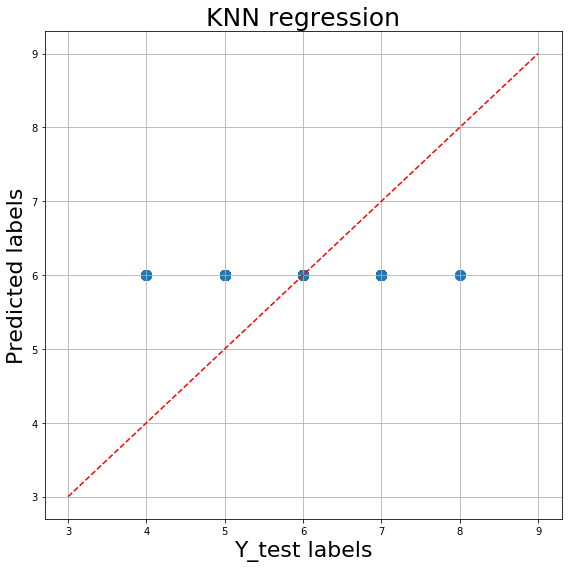

In [20]:
Y_pred = knn_regression(normalized_X_train,normalized_X_test,Y_train,10)
display(len(Y_pred),len(Y_test))

plt.figure(figsize=(8,8))
plt.plot(np.arange(3,10,1),np.arange(3,10,1),"--r")
plt.scatter(Y_test,Y_pred,s=100, alpha=0.7)
plt.title("KNN regression", fontsize=25)
plt.xlabel("Y_test labels", fontsize=22)
plt.ylabel("Predicted labels", fontsize=22)

plt.tight_layout()
plt.grid()
plt.show()

Let's dwelve into why only 5s are being choosen.

In [14]:
    #0. even though i converted them, should convert here for broader future applications
    k = 20
    x_test = np.array(normalized_X_test); x_train = np.array(normalized_X_train); y_train = np.array(Y_train)
    y_pred = []
    test_point = x_test[0,:]
        
    #predefine data storages, rather then list.appends...
    distances = np.zeros(len(x_train), dtype=float)
    indeces = np.zeros(len(x_train), dtype=int)
        
    #1.1. calculate dist - enumerate 4 the win
    for i,train_point in enumerate(x_train):
        dist = euclidean_distance(test_point, train_point)
        indeces[i] = i
        distances[i] = dist 
            
    #2. sorting - we only need the first k amount of neighbours
    indeces, distances = zip(*sorted(list(zip(indeces,distances))))
    #we have to know their original labels
    top_k_points = x_train[list(indeces)[:k]]
    top_k_labels = y_train[list(indeces)[:k]]
    top_k_dists = list(distances)[:k]
    display(top_k_dists)
        
    #3. unique values with np.unique
    max_label_loc = 0
    L_unique, L_index, L_count = np.unique(top_k_labels, return_index=True, return_counts=True,axis=0)
    #this returns a sorted array, sorted by labels increasing, thus i just have to know where is the max and choose 
    chosed_label = L_unique[max(L_count) == L_count]
    display(L_unique, L_count)
                
    #NOTE
    #More sophisticated way could by used, due to this always giving back the first appearence, thus a lower quality
    #this will be visible
        
    #4. predict
    
    y_pred.append(chosed_label)
    display(y_pred)

[4.570381075620479,
 3.4640615510008357,
 5.290399179869386,
 3.4289782565115168,
 3.705149034953149,
 4.760188415476906,
 4.402517470803567,
 5.232595235257658,
 5.248444649812187,
 3.8459487568492228,
 4.8614532188631285,
 4.651440099659194,
 4.299073805165525,
 5.531028477607441,
 3.9893368051750047,
 4.7823644406047405,
 3.154615948413404,
 5.2703112435046595,
 4.757332708250661,
 6.835289593730964]

array([4, 5, 6, 7])

array([1, 6, 9, 4])

[array([6])]

So it seems like, no matter what, there are too many 5s in the vicinity of the test point, which literally forces the choosing of 5. Thus, no matter what, 5 is being choosen.

---

### 3. Weighted KNN regression
- Modify the knn_regression function by adding a weight to each neighbor that is inversely proportional to the distance.
```python
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    """Return prediction with weighted knn regression."""
    ...
    return y_pred
```
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

I will choos the closest neighbours, but i will chooe the label that has the highest weight among all labels.


In [21]:
def knn_weighted_regression(x_train, x_test, y_train, k=20):
    """
    Return prediction with knn weighted regression.
    -----------------------------
    INPUT:
    X_TEST
    X_TRAIN
    Y_TRAIN
    K = 20
    
    -----------------------------
    OUTPUT:
    Y_PRED
    
    """
    #0. even though i converted them, should convert here for broader future applications
    x_test = np.array(x_test); x_train = np.array(x_train); y_train = np.array(y_train)
    y_pred = []
    
    for test_point in x_test:
        
        #predefine data storages, rather then list.appends...
        distances = np.zeros(len(x_train), dtype=float)
        indeces = np.zeros(len(x_train), dtype=int)
        
        #1.1. calculate dist - enumerate 4 the win
        for i,train_point in enumerate(x_train):
            dist = euclidean_distance(test_point, train_point)
            indeces[i] = i
            distances[i] = dist 
            
        #2. sorting - we only need the first k amount of neighbours
        indeces, distances = zip(*sorted(list(zip(indeces,distances))))
        #we have to know their original labels
        top_k_points = x_train[list(indeces)[:k]]
        top_k_labels = y_train[list(indeces)[:k]]
        top_k_dists = np.array(list(distances))[:k]
        
        #3. unique values with np.unique
        max_label_loc = 0
        L_unique, L_index, L_count = np.unique(top_k_labels, return_index=True, return_counts=True,axis=0)
        #this returns a sorted array, sorted by labels increasing, thus i just have to know where is the max and choose 
        
        #4. sophisticated choosing... weihted neigbors
        dist_bal = np.zeros(len(L_count))
        for j in range(0,len(L_unique)):
            dist_bal[j] = sum(top_k_dists[top_k_labels == L_unique[j]]**-1)
        dist_bal = dist_bal/sum(dist_bal)
        chosed_label=L_unique[max(dist_bal) == dist_bal]
                
        
        #4. predict
        y_pred.append(chosed_label)
        

    return np.array(y_pred)

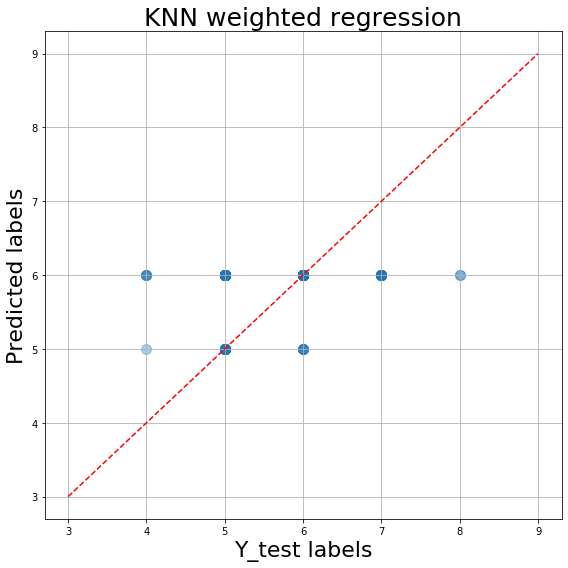

In [88]:
Y_pred = knn_weighted_regression(normalized_X_train,normalized_X_test,Y_train,10)


plt.figure(figsize=(8,8))
plt.plot(np.arange(3,10,1),np.arange(3,10,1),"--r")
plt.scatter(Y_test,Y_pred,s=100, alpha=0.2)
plt.title("KNN weighted regression", fontsize=25)
plt.xlabel("Y_test labels", fontsize=22)
plt.ylabel("Predicted labels", fontsize=22)

plt.tight_layout()
plt.grid()
plt.show()

In [23]:
    #0. even though i converted them, should convert here for broader future applications
    k = 20
    x_test = np.array(normalized_X_test); x_train = np.array(normalized_X_train); y_train = np.array(Y_train)
    y_pred = []
    test_point = x_test[0,:]
        
    #predefine data storages, rather then list.appends...
    distances = np.zeros(len(x_train), dtype=float)
    indeces = np.zeros(len(x_train), dtype=int)
        
    #1.1. calculate dist - enumerate 4 the win
    for i,train_point in enumerate(x_train):
        dist = euclidean_distance(test_point, train_point)
        indeces[i] = i
        distances[i] = dist 
            
    #2. sorting - we only need the first k amount of neighbours
    indeces, distances = zip(*sorted(list(zip(indeces,distances))))
    #we have to know their original labels
    top_k_points = x_train[list(indeces)[:k]]
    top_k_labels = y_train[list(indeces)[:k]]
    top_k_dists = np.array(list(distances))[:k]
    display(top_k_dists**-1)
        
    #3. unique values with np.unique
    max_label_loc = 0
    L_unique, L_index, L_count = np.unique(top_k_labels, return_index=True, return_counts=True,axis=0)
    #this returns a sorted array, sorted by labels increasing, thus i just have to know where is the max and choose 
    display(L_unique, L_count)
    
    dist_bal = np.zeros(len(L_count))
    
    #4. sophisticated choosing...
    for j in range(0,len(L_unique)):
        dist_bal[j] = sum(top_k_dists[top_k_labels == L_unique[j]]**-1)
    
    display(dist_bal/sum(dist_bal))
    #5. predict
    chosed_label=L_unique[max(dist_bal) == dist_bal]
    display(chosed_label)
    y_pred.append(chosed_label)
    display(y_pred)

array([0.21880014, 0.28867847, 0.18902165, 0.29163206, 0.26989468,
       0.21007572, 0.22714277, 0.19110976, 0.19053264, 0.26001386,
       0.20569981, 0.21498718, 0.23260824, 0.1807982 , 0.25066823,
       0.20910159, 0.3169958 , 0.18974211, 0.21020182, 0.14629958])

array([4, 5, 6, 7])

array([1, 6, 9, 4])

array([0.06423636, 0.3053292 , 0.45897169, 0.17146274])

array([6])

[array([6])]

It does not matter. 5s are too spread out to just simply avoid them. Maybe if we knew their probability of occurence, maybe then a better kNN would born.

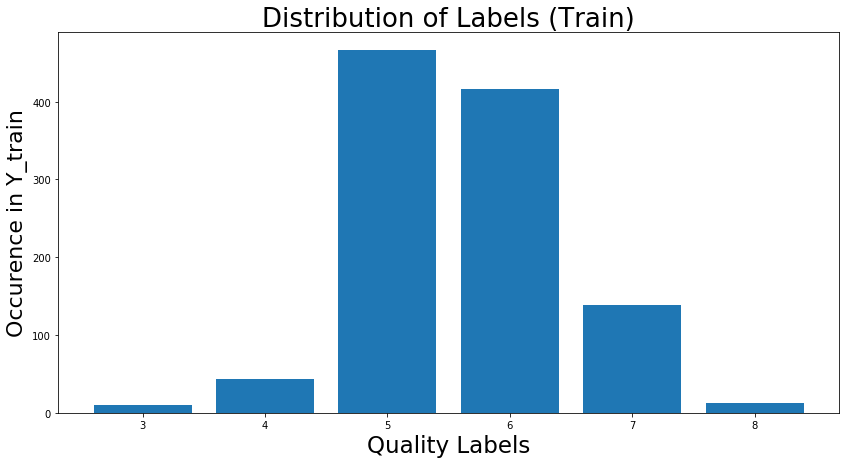

In [176]:
Y_train_labels, Y_train_counts = np.unique(Y_train,return_counts=True)

plt.figure(figsize=(14,7))
plt.bar(Y_train_labels,Y_train_counts)
plt.title("Distribution of Labels (Train)",fontsize=26)
plt.xlabel("Quality Labels",fontsize=23)
plt.ylabel("Occurence in Y_train",fontsize=22)

plt.show()

Now it is clear as day, why the kNN is bad here: outliers exists in data that are simply surrounded by common and prominent quality labels.

---

### 4. KNN classification
- Implement the K-nearest neighbors classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
```python
def knn_classifier(X_train, y_train, X_test, k=20):
  """Return prediction with knn classification."""
    ...
    return y_pred
```

- Make prediction with k=20 for the test set using the training data.

-----



In [128]:
#at this point, idk what i am gonna do, but gonna go a different way
#define this, maybe this is better than my handmade
def ln(a, b, n):
    """
    Calculates the n-norm of two input vectors
    
    """
    return np.linalg.norm((a - b), ord=n)

def knn_classifier_regression(x_train, x_test, y_train, k=20):
    """
    Return prediction with knn classifier regression.
    -----------------------------
    INPUT:
    X_TEST
    X_TRAIN
    Y_TRAIN
    K = 20
    
    -----------------------------
    OUTPUT:
    Y_PRED
    
    """
    #0. even though i converted them, should convert here for broader future applications
    x_test = np.array(x_test); x_train = np.array(x_train); y_train = np.array(y_train)
    y_pred = []
    
    for test_point in x_test:
        
        #predefine data storages, rather then list.appends...
        distances = np.zeros(len(x_train), dtype=float)
        indeces = np.zeros(len(x_train), dtype=int)
        
        #1.1. calculate dist - enumerate 4 the win
        for i,train_point in enumerate(x_train):
            dist = euclidean_distance(test_point, train_point)
            indeces[i] = i
            distances[i] = dist 
            
        #2. sorting - we only need the first k amount of neighbours
        indeces, distances = zip(*sorted(list(zip(indeces,distances))))
        #we have to know their original labels
        top_k_points = x_train[list(indeces)[:k]]
        top_k_labels = y_train[list(indeces)[:k]]
        top_k_dists = np.array(list(distances))[:k]
        
        #3. unique values with np.unique
        max_label_loc = 0
        L_unique, L_index, L_count = np.unique(top_k_labels, return_index=True, return_counts=True,axis=0)
        #this returns a sorted array, sorted by labels increasing, thus i just have to know where is the max and choose 
        
        #4. sophisticated choosing... weihted neigbors
        chosed_label = np.random.choice(np.arange(0,len(L_count)),p=L_count/k)
                
        
        #5. predict
        y_pred.append(L_unique[chosed_label])
        

    return np.array(y_pred)

In [133]:
Y_pred = knn_classifier_regression(normalized_X_train,normalized_X_test,one_hot_quality_train,10)

display(Y_pred)

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [195]:
Y_pred_decoded = np.zeros(len(Y_pred))

for i in range(0,len(Y_pred)):
    for j in range(0,len(list(qualities_train.values()))):
        if np.array_equal(Y_pred[i],list(qualities_train.values())[j]):
            Y_pred_decoded[i] = list(qualities_train.keys())[j]

display(len(Y_pred_decoded))

Y_test_labels, Y_test_counts = np.unique(Y_test,return_counts=True)
Y_pred_labels, Y_pred_counts = np.unique(Y_pred_decoded,return_counts=True)

accMy = accuracy_score(Y_test,Y_pred_decoded)

272

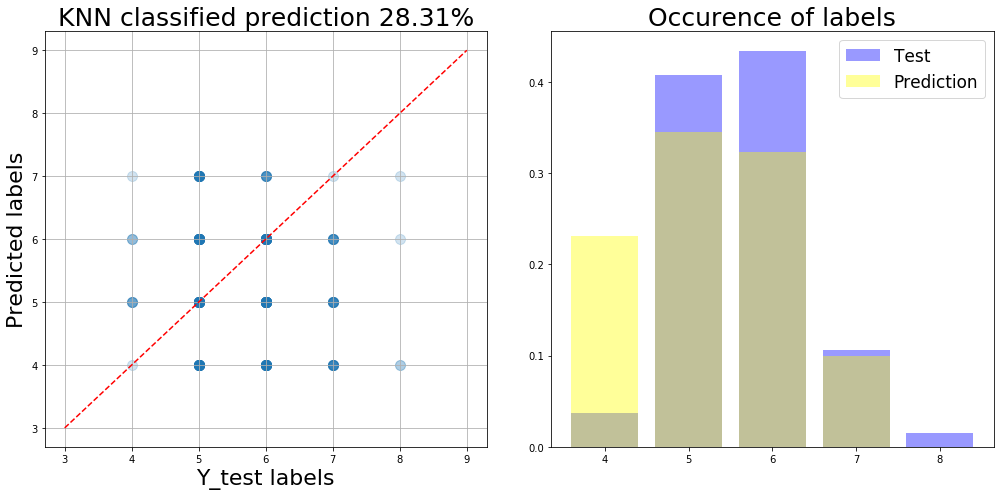

In [196]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
ax[0].plot(np.arange(3,10,1),np.arange(3,10,1),"--r")
ax[0].scatter(Y_test,Y_pred_decoded,s=100, alpha=0.2)
ax[0].set_title("KNN classified prediction {0:.2f}%".format(accMy), fontsize=25)
ax[0].set_xlabel("Y_test labels", fontsize=22)
ax[0].set_ylabel("Predicted labels", fontsize=22)
ax[0].grid(True)

ax[1].set_title("Occurence of labels", fontsize=25)
ax[1].bar(Y_test_labels,Y_test_counts/sum(Y_test_counts),alpha=0.4,color="Blue",label="Test")
ax[1].bar(Y_pred_labels,Y_pred_counts/sum(Y_pred_counts),alpha=0.4, color="Yellow",label="Prediction")
ax[1].legend(loc="best",fontsize=17)

fig.tight_layout()
plt.show()

So this random picking somewhat solves the problem but due to its randomness, it  skews the prediction.

### 5. Compare the models
- Make a baseline model: this can be the mean value of the training labels for every sample.
- Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
- Check your KNN implementations by running the sklearn built-in model. 
You can run it for any model you implented. The predictions should be the same as yours. Some help:
  ```python
  from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
  knn= KNeighborsRegressor(20, weights="distance")
  #knn= KNeighborsClassifier(20, weights="uniform")
  knn.fit(X_train, y_train)
  knn.predict(X_test)
  ```
- Write down your observations.


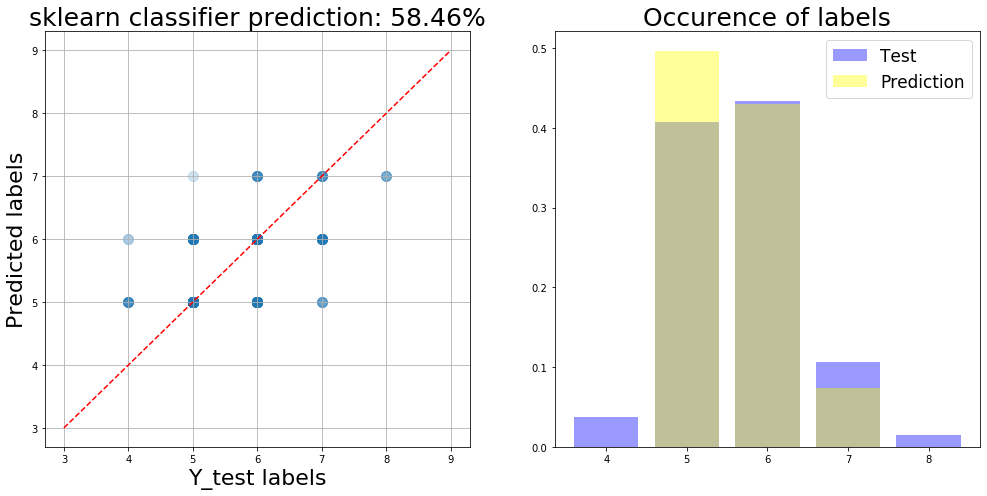

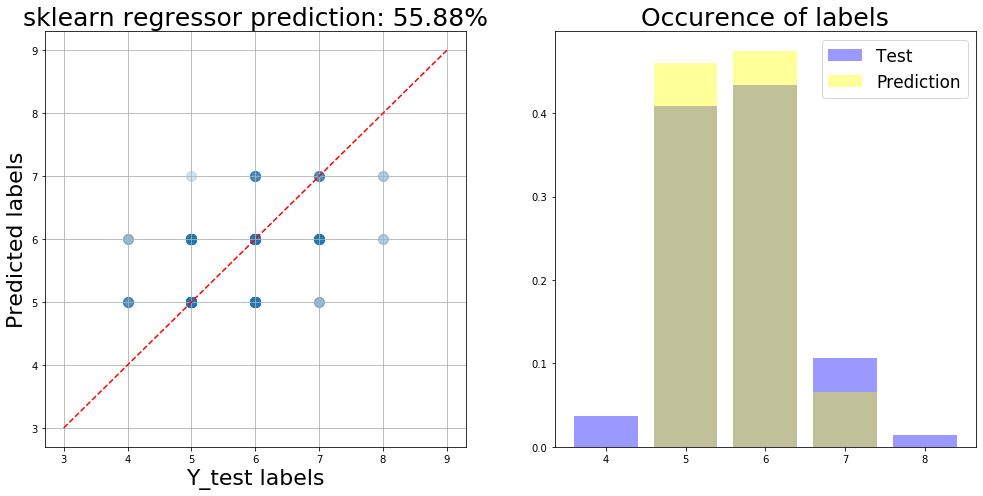

In [194]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

#------------------REGRESSOR-----------------------------------#
kReg = KNeighborsRegressor(n_neighbors=20,weights="distance")
kReg.fit(normalized_X_train, Y_train)
sklearn_reg_pred = np.around(kReg.predict(normalized_X_test))

#------------------CLASSIFIER----------------------------------#
kClass = KNeighborsClassifier(n_neighbors=20,weights="distance")
kClass.fit(normalized_X_train, Y_train)
sklearn_pred = kClass.predict(normalized_X_test)

#-------------------------COUNTING-----------------------------#


Y_test_labels, Y_test_counts = np.unique(Y_test,return_counts=True)
Y_kReg_labels, Y_kReg_counts = np.unique(sklearn_reg_pred,return_counts=True)
Y_kCla_labels, Y_kCla_counts = np.unique(sklearn_pred,return_counts=True)

accReg = accuracy_score(Y_test,sklearn_reg_pred)
accCla = accuracy_score(Y_test,sklearn_pred)

#--------------------------------PLOTS---------------------------#

fig,ax = plt.subplots(1,2,figsize=(14,7))
ax[0].plot(np.arange(3,10,1),np.arange(3,10,1),"--r")
ax[0].scatter(Y_test,sklearn_pred,s=100, alpha=0.2)
ax[0].set_title("sklearn classifier prediction: {0:.2f}%".format(accCla), fontsize=25)
ax[0].set_xlabel("Y_test labels", fontsize=22)
ax[0].set_ylabel("Predicted labels", fontsize=22)
ax[0].grid(True)

ax[1].set_title("Occurence of labels", fontsize=25)
ax[1].bar(Y_test_labels,Y_test_counts/sum(Y_test_counts),alpha=0.4,color="Blue",label="Test")
ax[1].bar(Y_kCla_labels,Y_kCla_counts/sum(Y_kCla_counts),alpha=0.4, color="Yellow",label="Prediction")
ax[1].legend(loc="best",fontsize=17)

fig.tight_layout()
plt.show()

fig,ax = plt.subplots(1,2,figsize=(14,7))
ax[0].plot(np.arange(3,10,1),np.arange(3,10,1),"--r")
ax[0].scatter(Y_test,sklearn_reg_pred,s=100, alpha=0.2)
ax[0].set_title("sklearn regressor prediction: {0:.2f}%".format(accReg), fontsize=25)
ax[0].set_xlabel("Y_test labels", fontsize=22)
ax[0].set_ylabel("Predicted labels", fontsize=22)
ax[0].grid(True)

ax[1].set_title("Occurence of labels", fontsize=25)
ax[1].bar(Y_test_labels,Y_test_counts/sum(Y_test_counts),alpha=0.4,color="Blue",label="Test")
ax[1].bar(Y_kReg_labels,Y_kReg_counts/sum(Y_kReg_counts),alpha=0.4, color="Yellow",label="Prediction")
ax[1].legend(loc="best",fontsize=17)

fig.tight_layout()
plt.show()

So these perform better than my implementation, but their accuracy is not that high though, which indicates that a correct guess is hard to make while only counting with the neightbours. Mine still seems to be better guessing outliers, even if it means "overguessing" them.

----
### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!